0.7192193845329478


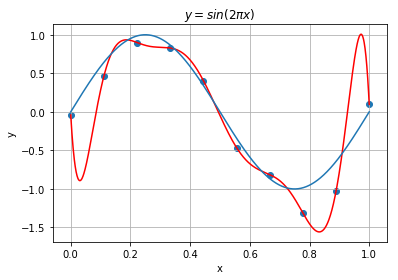

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV
from sklearn.linear_model import Ridge, RidgeCV
%matplotlib inline

# 训练集
np.random.seed(0)
a_train = np.random.random((1, 10)) - 0.5
x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train)
y_train = y_train - a_train / 1.2
y_train = y_train[0]

# 测试集
a_test = np.random.random((1, 5)) - 0.5
x_test = np.linspace(0.9, 1.0, 5)
y_test = np.sin(2 * np.pi * x_test)
y_test = y_test - a_test / 1.2
y_test = y_test[0]

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# 9次多项式回归
quadratic_featurizer = PolynomialFeatures(degree=9)
x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
model = LinearRegression()
model = model.fit(x_train_quadratic, y_train)

xx = np.linspace(0, 1, 1000)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
yy_predict = model.predict(xx_quadratic)
plt.plot(xx, yy_predict, 'r-')

x_pred2 = quadratic_featurizer.transform(x_train.reshape(x_train.shape[0], 1))
y_pred2 = model.predict(x_pred2)
model2_train_mean_sqaured_error = mean_squared_error(y_train, y_pred2)

x_pred1 = quadratic_featurizer.transform(x_test.reshape(x_test.shape[0], 1))
y_pred1 = model.predict(x_pred1)
model_test_mean_sqaured_error = mean_squared_error(y_test, y_pred1)
print(model_test_mean_sqaured_error)

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
plt.scatter(x_train, y_train)
plt.plot(x, y)
plt.title(r'$y=sin(2{\pi}x)$') 
plt.xlabel('x') 
plt.ylabel('y')  
plt.grid(True)
plt.show()

系数为0.000000时
L2正则化的均方根误差： 0.7192193844774629


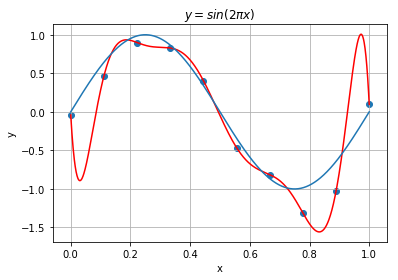

0.00,-66.03,1645.34,-14992.17,71516.22,-198878.61,332734.75,-329355.84,177483.27,-40086.79,-0.040677919926224854
系数为0.000100时
L2正则化的均方根误差： 0.05302450320772266


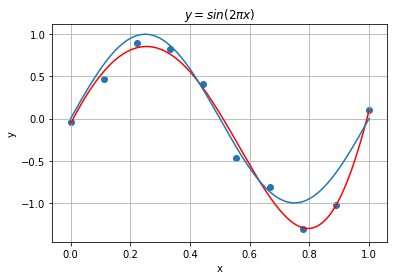

0.00,6.96,-11.82,-6.48,2.21,5.76,5.06,2.40,-0.64,-3.30,-0.06014704620024716
系数为0.010000时
L2正则化的均方根误差： 0.10889479929479533


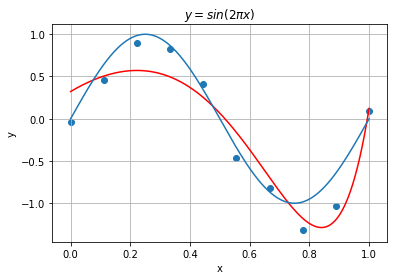

0.00,2.09,-3.66,-2.83,-1.13,0.18,0.97,1.35,1.45,1.39,0.3219786748154656
系数为0.100000时
L2正则化的均方根误差： 0.07585876125033583


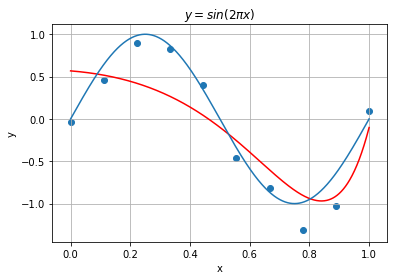

0.00,-0.29,-1.41,-1.15,-0.63,-0.12,0.30,0.63,0.89,1.10,0.5673418591112331
系数为1.000000时
L2正则化的均方根误差： 0.15207447668762655


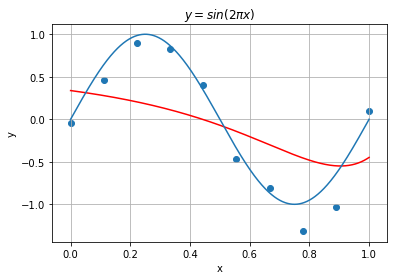

0.00,-0.47,-0.48,-0.33,-0.17,-0.04,0.07,0.15,0.22,0.27,0.337702630216849


In [5]:
n=1
for i in [0, 0.0001,0.01, 0.1, 1]:
    Ridge_poly9 = Ridge(alpha=i)
#     Ridge_poly9 = RidgeCV()       
    Ridge_poly9.fit(x_train_quadratic, y_train)
    y_Ridge_pred = Ridge_poly9.predict(x_pred1)
    yy_Ridge_pred = Ridge_poly9.predict(xx_quadratic)
    plt.plot(xx, yy_Ridge_pred, 'r-')
    print('系数为%f时' % i)
    print("L2正则化的均方根误差：", mean_squared_error(y_test, y_Ridge_pred))
#   print('最佳的alpha：',Ridge_poly9.alpha_) # 只有在使用RidgeCV时才有效

    plt.scatter(x_train, y_train)
    plt.plot(x, y)
    plt.title(r'$y=sin(2{\pi}x)$') 
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.grid(True)
#     plt.savefig('reg%d.jpg' % (n), )
    plt.show()
    n+=1
    list=Ridge_poly9.coef_[0]
    for n in list:
        print(format(n,'.2f'),end=",")
    print(Ridge_poly9.intercept_[0])